## Métodos Numéricos II: Ejercicios Práctica 1

#### Autor: Juan Manuel Rodríguez Gómez

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sympy as sp

In [3]:
from numpy import sign

In [4]:
#from decimal import *
# Este módulo nos permitirá trabajar con un precisión determinada (en coma flotante)
# Si no añadimos esto se trabaja con una precisión 15-16
#getcontext()

In [5]:
#mporig = getcontext().prec
#mporig  # Esta sería la precisión con la que se trabaja por defecto

In [6]:
x = sp.Symbol("x") # Variable simbólica x

## Ejercicio 1
#### Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

#### Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.

In [7]:
def f(x):
    ''' función x**3+4*x**2-10'''
    return x**3+4*x**2-10

In [8]:
a = 1 
b = 2

f(x) es monótona en $[1,2]$ porque $f'(x)=3x^2+2x$ solo toma valores positivos en dicho intervalo. 
Si hay una raíz, ésta será única (por el Teorema de Bolzano) si $f(1)f(2)<0$.

In [9]:
def cambioDeSigno(f,a,b):
    print('f(',a,') * f(',b,') = ',f(a),' * ',f(b),' = ',f(a)*f(b))
    
    if sign(f(a)) != sign(f(b)):
        print('Hay cambio de signo en [',a, ',', b,']')
    else:
        print('NO hay cambio de signo en [',a, ',', b,']')

In [10]:
cambioDeSigno(f,a,b)

f( 1 ) * f( 2 ) =  -5  *  14  =  -70
Hay cambio de signo en [ 1 , 2 ]


#### Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas.

In [11]:
a0 = a; b0 = b # Guardo los extremos iniciales porque los voy a modificar

# Trabajando con la precisión habitual en coma flotante
def biseccion(a,b,tol,prec,nmax):
    niter = 0; sale = ''
    for k in range(nmax):
        niter = niter + 1;
        c = a + (b-a)/2 # equivalente a c = (a+b)/2
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif niter < nmax:
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones')
    print('Número total de iteraciones ', niter)

    a = a0; b = b0 # Restauramos los valores originales de a y b

In [12]:
nmax = 100      # Número máximo de iteraciones
prec = 10**(-16)
tol = 10**(-3)

biseccion(a,b,tol,prec,nmax)

Aproximación solicitada:  1.3642578125
Número total de iteraciones  10


Podemos hacer una gráfica de la función en el intervalo $[1,2]$ para comprobar que, efectivamente, el punto dado por el método de bisección es una raíz de $f(x)$

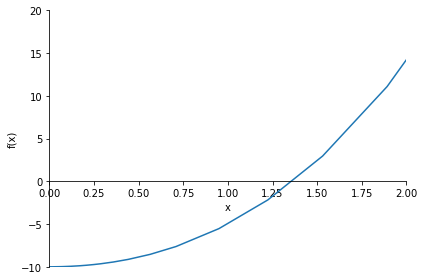

In [13]:
sp.plot(f(x),xlim=(0.,2.),ylim=(-10.,20.))

#### ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?

In [14]:
def IteracionesNecesarias(a,b,tolerancia):
    return np.ceil( np.log( (b-a)/tolerancia )/np.log(2)-1)

In [15]:
tol = 10**(-5) # Queremos calcular la raíz con 5 cifras decimales exactas


IteracionesNecesarias(a,b,tol)

16.0

#### Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

In [16]:
def df(x):
    ''' función 3*x**2+8*x'''
    return 3*x**2+8*x

In [17]:
def NewtonRaphson(b,tol,prec,nmax):
    x0 = b; niter = 0; sale =''

    for k in range(nmax):
        niter = niter + 1;
        x1 = x0 - f(x0)/df(x0) 
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    print('sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')
    print('Número total de iteraciones ', niter)


In [18]:
tol = 10**(-3)

NewtonRaphson(b,tol,prec,nmax) # Tomo por ejemplo el punto b como semilla x0

sale el programa por  tolerancia
Aproximación solicitada:  1.3652300139161466
Número total de iteraciones  4


## Ejercicio 2
#### Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos (tol =$10^{-2}$), usando el algoritmo de bisección.

In [19]:
def f(x):     # Lo que nos están pidiendo es calcular la solución de la ecuación x^3-25=0
    ''' función x**3-25'''
    return x**3-25

Primero tenemos que ver sobre qué intervalo vamos a aplicar el método de bisección. 

Sabemos que $2^3=8<25$ y $3^3=27>25$. Por tanto, dicho intervalo será el [2,3].

$f(x)$ es monótona en [2,3] porque $f'(x)=3x^2$ solo toma valores positivos en dicho intervalo. 
Si hay una raíz, ésta será única (por el Teorema de Bolzano) si $f(2)f(3) < 0$.

In [20]:
a = 2
b = 3

In [21]:
cambioDeSigno(f,a,b)

f( 2 ) * f( 3 ) =  -17  *  2  =  -34
Hay cambio de signo en [ 2 , 3 ]


In [22]:
tol = 10**(-2)

biseccion(a,b,tol,prec,nmax)
print('Solucion real: ', 25**(1/3))

Aproximación solicitada:  2.9296875
Número total de iteraciones  7
Solucion real:  2.924017738212866


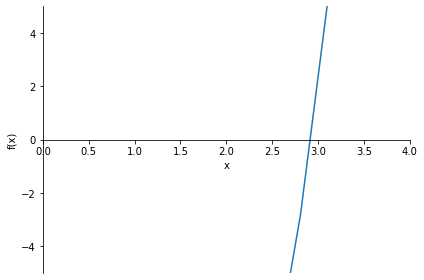

In [23]:
sp.plot(f(x),xlim=(0.,4.),ylim=(-5.,5.))

## Ejercicio 3
#### Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

#### i) $x^3-x-1 = 0$  en $[1,2]$.





In [24]:
def f(x):
    ''' función x**3-x-1'''
    return x**3-x-1

In [25]:
def df(x):
    ''' función 3*x**2-1'''
    return 3*x**2-1

In [26]:
tol = 10**(-5)
x0 = 2
NewtonRaphson(x0,tol,prec,nmax)

sale el programa por  tolerancia
Aproximación solicitada:  1.3247179572458576
Número total de iteraciones  5


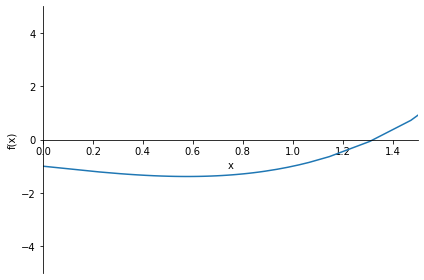

In [27]:
sp.plot(f(x),xlim=(0.,1.50),ylim=(-5.,5.))

#### ii) $3x=2+x^2-e^x$.

In [28]:
def f(x):
    ''' función x**2-3*x+2-np.exp(x)'''
    return x**2-3*x+2-np.exp(x)

In [29]:
def df(x):
    ''' función 2*x-3-np.exp(x)'''
    return 2*x-3-np.exp(x)

In [30]:
a = 0
b = 1

Por el Teorema de Bolzano, $f(x)$ tendrá al menos una raíz en el intervalo $[0,1]$ si $f(0)f(1)<0$.

In [31]:
cambioDeSigno(f,a,b)

f( 0 ) * f( 1 ) =  1.0  *  -2.718281828459045  =  -2.718281828459045
Hay cambio de signo en [ 0 , 1 ]


In [32]:
tol = 10**(-5)
x0 = b

NewtonRaphson(x0,tol,prec,nmax)

sale el programa por  tolerancia
Aproximación solicitada:  0.25753028543986073
Número total de iteraciones  4


In [33]:
def f(x):
    ''' función x**2-3*x+2-sp.exp(x)'''
    return x**2-3*x+2-sp.exp(x)

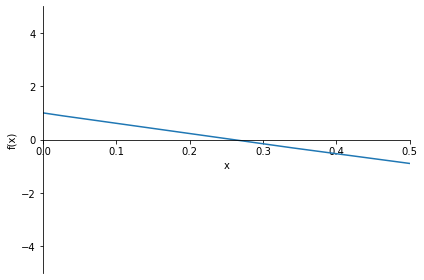

In [34]:
sp.plot(f(x),xlim=(0.,0.5),ylim=(-5.,5.))

#### iii) $x^2+10\, cos x+x=0$.

In [35]:
def f(x):
    ''' función x**2+10*np.cos(x)+x)'''
    return x**2+10*np.cos(x)+x

In [36]:
def df(x):
    ''' función 2*x-10*np.sin(x)+1'''
    return 2*x-10*np.sin(x)+1

In [37]:
a = -2
b = -1

Por el Teorema de Bolzano, $f(x)$ tendrá al menos una raíz en el intervalo $[-2,-1]$ si $f(-2)f(-1)<0$.

In [38]:
cambioDeSigno(f,a,b)

f( -2 ) * f( -1 ) =  -2.161468365471424  *  5.403023058681398  =  -11.678463419252495
Hay cambio de signo en [ -2 , -1 ]


In [39]:
tol = 10**(-5)
x0 = -1

NewtonRaphson(x0,tol,prec,nmax)

sale el programa por  tolerancia
Aproximación solicitada:  -1.6869398997992398
Número total de iteraciones  4


In [40]:
def f(x):
    ''' función x**2+10*sp.cos(x)+x)'''
    return x**2+10*sp.cos(x)+x

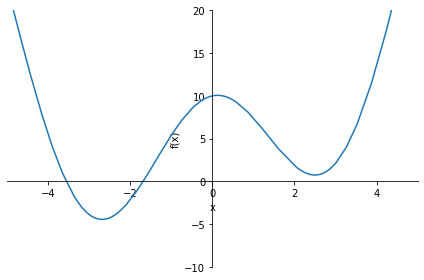

In [41]:
sp.plot(f(x),xlim=(-5.,5.),ylim=(-10.,20.))

## Ejercicio 4
#### Para la función  $f(x)= 3 x^2+e^x-1$, 

#### i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas; 

In [42]:
def f(x):
    ''' función 3*x**2+np.exp(x)-1'''
    return 3*x**2+np.exp(x)-1

In [43]:
a = 0
b = 1

f(x) es monótona en $[0,1]$ porque $f'(x)=6x+e^x$ solo toma valores positivos en dicho intervalo. 
Si hay una raíz, ésta será única (por el Teorema de Bolzano) si $f(0)f(1)<0$.

In [44]:
cambioDeSigno(f,a,b)

f( 0 ) * f( 1 ) =  0.0  *  4.718281828459045  =  0.0
Hay cambio de signo en [ 0 , 1 ]


In [45]:
tol = 10**(-4)

biseccion(a,b,tol,prec,nmax)

Aproximación solicitada:  6.103515625e-05
Número total de iteraciones  14



#### ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.

In [46]:
def df(x):
    ''' función 6*x+np.exp(x)'''
    return 6*x+np.exp(x)

In [47]:
x0 = 0

NewtonRaphson(x0,tol,prec,nmax)

sale el programa por  tolerancia
Aproximación solicitada:  0.0
Número total de iteraciones  1


In [48]:
def f(x):
    ''' función 3*x**2+sp.exp(x)-1'''
    return 3*x**2+sp.exp(x)-1

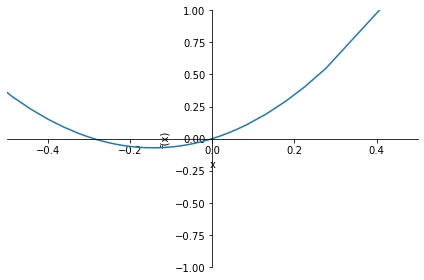

In [49]:
sp.plot(f(x),xlim=(-0.5,0.5),ylim=(-1.,1.))

## Ejercicio 5
#### Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

#### i) $f(x)=x^7-x^4+2$ ,

Una opción sería utilizar la orden `roots` de NumPy

In [50]:
coefs = [1,0,0,-1,0,0,0,2]
np.roots(coefs)

array([ 1.06110281+0.37638405j,  1.06110281-0.37638405j,
        0.15199934+1.01945595j,  0.15199934-1.01945595j,
       -0.71310215+0.98823189j, -0.71310215-0.98823189j,
       -1.        +0.j        ])

Vemos que nos da una única raíz real en el punto -1. 

Otra opción podría ser aplicar Sturm para hallar el intervalo donde se encuentran las raíces reales e ir dibujando la gráfica hasta ver a ojo cuáles son las raíces.

In [51]:
def f(x):
    ''' función x**7-x**4+2'''
    return x**7-x**4+2

Aplicando el método de acotación de raíces, tenemos que:

$$\alpha = max\left\{\frac{1}{1},\frac{2}{1}\right\} = 2$$

Por tanto, sabemos que las raices reales cumplen que $|s| \leq 1 + \alpha = 3$, es decir, las raíces reales se encuentran en el intervalo $[-3,3]$.

In [52]:
a = -3
b = 3

In [53]:
nxx = 100;
#Array de nodos equidistantes con 100 nodos
xx = np.linspace(a,b,nxx)  
yy = f(xx) 

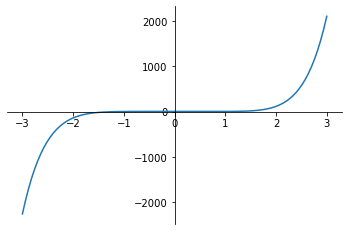

In [54]:
fig, ax = plt.subplots()  # de esta forma generamos una instancia
# de la clase figura, con sus correspondientes ejes 
# y con posibilidad de incluir varios gráficos en ella

# estas opciones evitan que se dibujen
ax.spines['right'].set_color('none')   # tanto el borde derecho
ax.spines['top'].set_color('none') # como el superior del gráfico
 
# mientras que las opciones siguientes sirven
ax.xaxis.set_ticks_position('bottom')
# para fijar la posición de las marcas en la parte inferior 
ax.spines['bottom'].set_position(('data',0)) 
# y situar el eje Ox en la recta horizontal y=0

# y estas para fijar la posición de las marcas 
ax.yaxis.set_ticks_position('left')  # a la izquierda del eje Oy
ax.spines['left'].set_position(('data',0))   
# y situar éste en la recta vertical x=0

# ahora es cuando generamos el gráfico en sí
ax.plot(xx, yy); # como una instancia de la clase ejes

Vemos que la raíz/raices están claramente entre -2 y 2.

In [55]:
a = -2 
b = 2

In [56]:
nxx = 100;
#Array de nodos equidistantes con 100 nodos
xx = np.linspace(a,b,nxx)  
yy = f(xx) 

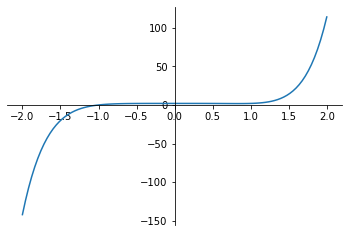

In [57]:
fig, ax = plt.subplots()  # de esta forma generamos una instancia
# de la clase figura, con sus correspondientes ejes 
# y con posibilidad de incluir varios gráficos en ella

# estas opciones evitan que se dibujen
ax.spines['right'].set_color('none')   # tanto el borde derecho
ax.spines['top'].set_color('none') # como el superior del gráfico
 
# mientras que las opciones siguientes sirven
ax.xaxis.set_ticks_position('bottom')
# para fijar la posición de las marcas en la parte inferior 
ax.spines['bottom'].set_position(('data',0)) 
# y situar el eje Ox en la recta horizontal y=0

# y estas para fijar la posición de las marcas 
ax.yaxis.set_ticks_position('left')  # a la izquierda del eje Oy
ax.spines['left'].set_position(('data',0))   
# y situar éste en la recta vertical x=0

# ahora es cuando generamos el gráfico en sí
ax.plot(xx, yy); # como una instancia de la clase ejes

Vemos que la raíz/raices están claramente entre -1.5 y 1.5

In [58]:
a = -1.5
b = 1.5

In [59]:
nxx = 100;
#Array de nodos equidistantes con 100 nodos
xx = np.linspace(a,b,nxx)  
yy = f(xx) 

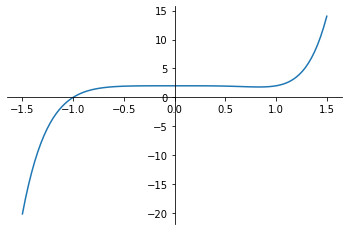

In [60]:
fig, ax = plt.subplots()  # de esta forma generamos una instancia
# de la clase figura, con sus correspondientes ejes 
# y con posibilidad de incluir varios gráficos en ella

# estas opciones evitan que se dibujen
ax.spines['right'].set_color('none')   # tanto el borde derecho
ax.spines['top'].set_color('none') # como el superior del gráfico
 
# mientras que las opciones siguientes sirven
ax.xaxis.set_ticks_position('bottom')
# para fijar la posición de las marcas en la parte inferior 
ax.spines['bottom'].set_position(('data',0)) 
# y situar el eje Ox en la recta horizontal y=0

# y estas para fijar la posición de las marcas 
ax.yaxis.set_ticks_position('left')  # a la izquierda del eje Oy
ax.spines['left'].set_position(('data',0))   
# y situar éste en la recta vertical x=0

# ahora es cuando generamos el gráfico en sí
ax.plot(xx, yy); # como una instancia de la clase ejes

Ahora sí podemos apreciar claramente que **hay una única raíz real en un entorno entre -1.5 y -0.5, y dicha raíz será -1.**

Apliquemos el método de bisección para comprobarlo.

In [61]:
a = -1.5
b = -0.5

In [62]:
biseccion(a,b,tol,prec,nmax)

Posiblemente solución exacta:  -1.0
Número total de iteraciones  1


#### ii) $f(x)=x^7+\cos  x-3$.

Para este apartado, usamos la función fsolve

In [63]:
def f(x):
    ''' función x**7+np.cos(x)-3'''
    return x**7+np.cos(x)-3

In [64]:
from scipy.optimize import fsolve

In [65]:
fsolve(f,1)

array([1.14545981])

Observamos la raíz gráficamente:

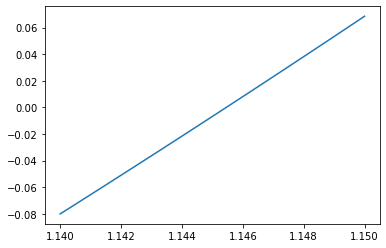

In [66]:
nxx = 100;
#Array de nodos equidistantes con 100 nodos
xx = np.linspace(1.14,1.15,nxx)  
yy = f(xx)
plt.plot(xx,yy)

## Ejercicio 6
#### Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

In [67]:
def f(x):  # Usamos como ejemplo la función del ejercicio 1
    ''' función x**3 + 4*x**2 - 10'''
    return x**3 + 4*x**2 - 10 

def df(x):
    ''' función 3*x**2+8*x'''
    return 3*x**2+8*x

def g(x):    
    ''' función x - f(x)'''
    return x - f(x)

Definimos una sucesión en la que cada término se calcula usando el método de Bisección.

In [68]:
def Suc_Biseccion(a,b,tol,prec,nmax):
    lista=[]
    for k in range(nmax):
        c = (a+b)/2
        lista.append(c)
        if abs(f(c)) < prec:
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            break
    return lista

Definimos una sucesión hasta un cierto número natural $n$ en la que cada término se calcula usando el método de Newton-Raphson. 

In [69]:
def Suc_NR(b,tol,prec,nmax):
    x0 = b;
    lista = [x0]

    for k in range(nmax):
        x1 = x0 - f(x0)/df(x0) 
        lista.append(x1)
        if abs(x1-x0) < tol:
            break
        if abs(f(x1)) < prec:
            break
        else:
            x0 = x1

    return lista

Ahora definimos el método de aceleración de Aitken.

In [70]:
def aitken(s0, s1, s2):
    return (s2*s0-s1**2)/(s2-2*s1+s0)

def Suc_Aitken(lista_original):
    lista_resultante = [lista_original[0]]
    for i in range( len(lista_original)-2):
        lista_resultante.append( aitken( lista_original[i], lista_original[i+1], lista_original[i+2]))
    return lista_resultante

Definimos también el método de aceleración de Steffensen.

In [71]:
  def Suc_Steffensen(x0, n):
    lista_resultante = [x0]
    terminos = [x0,g(x0),g(g(x0))]
    
    for i in range(n):
        x0 = aitken( terminos[0], terminos[1], terminos[2]) #Cuando consigo los 3 términos acelero mediante Aitken
        terminos = [x0,g(x0),g(g(x0))]
        lista_resultante.append(x0)
        
    return lista_resultante  

Finalmente, comparamos los resultados de los distintos métodos.

In [72]:
# Bisección

suc_bis = Suc_Biseccion(1,2,tol,prec,nmax)
suc_bis_aitken = Suc_Aitken(suc_bis)
# No aplicamos Steffensen a Bisección porque no es un método de iteración funcional

In [73]:
print('Bisección:')
suc_bis

Bisección:


[1.5,
 1.25,
 1.375,
 1.3125,
 1.34375,
 1.359375,
 1.3671875,
 1.36328125,
 1.365234375,
 1.3642578125,
 1.36474609375,
 1.364990234375,
 1.3651123046875,
 1.36517333984375]

In [74]:
print('Aceleración de Aitken (Bisección):')
suc_bis_aitken

Aceleración de Aitken (Bisección):


[1.5,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.375,
 1.375,
 1.3645833333333333,
 1.3645833333333333,
 1.3645833333333333,
 1.3645833333333333,
 1.365234375,
 1.365234375,
 1.365234375]

In [75]:
# Newton-Raphson
tol = 10**(-3)

suc_nr = Suc_NR(2,tol,prec,nmax)
suc_nr_aitken = Suc_Aitken(suc_nr)
suc_nr_steffensen = Suc_Steffensen(1,10)

In [76]:
print('Newton-Raphson:')
suc_nr

Newton-Raphson:


[2, 1.5, 1.3733333333333333, 1.3652620148746266, 1.3652300139161466]

In [77]:
print('Aceleración de Aitken (Newton-Raphson):')
suc_nr_aitken

Aceleración de Aitken (Newton-Raphson):


[2, 1.3303571428571428, 1.3647127000604604, 1.3652298865345363]

In [78]:
print('Aceleración de Steffensen (Newton-Raphson):')
suc_nr_steffensen

Aceleración de Steffensen (Newton-Raphson):


[1,
 1.0704225352112675,
 1.1405216774373526,
 1.208704439295944,
 1.2716154892695066,
 1.3229737969182453,
 1.3543984470776824,
 1.3643912204036042,
 1.365224688545221,
 1.36523001319838,
 1.3652300140917395]

Comparando los diferentes resultados, se puede observar que se obtienen más rápidamente la solución a la que queremos llegar, usando los métodos de aceleración de Aitken y de Steffensen aplicados a Bisección (Steffensen no se aplica a Bisección ya que este no es un método de iteración funcional) y a Newton-Raphson (obteniéndose un resultado más preciso con el método de aceleración de Steffensen).

## Ejercicio 7
#### Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

In [79]:
def f(x):    # Esta función tiene una raíz doble en x = 5
    ''' función np.log(x)*(x-5)**2'''
    return np.log(x)*(x-5)**2

In [80]:
def NewtonRaphson_Acelerado(x0,tol,prec,nmax,m):
    lista=[x0]
    
    for k in range(nmax):
        x1 = x0 - m*f(x0)/df(x0) 
        lista.append(x1)
        if abs(x1-x0) < tol:
            return lista
        if abs(f(x1)) < prec:
            return lista
        else:
            x0 = x1
    return lista

In [81]:
sucesion_NR = Suc_NR(5.2,tol,prec,nmax)
sucesion_NR

[5.2, 5.199462627566628]

In [82]:
sucesion_NR_acelerada = NewtonRaphson_Acelerado(5.2,tol,prec,nmax,2)  
sucesion_NR_acelerada

[5.2,
 5.198925255133255,
 5.197861798243287,
 5.196809454523996,
 5.195768052727475,
 5.194737425074609,
 5.193717407168336,
 5.19270783790948,
 5.191708559415072]

In [83]:
sucesion_NR_aitken = Suc_Aitken(sucesion_NR)
sucesion_NR_aitken

[5.2]

In [84]:
sucesion_NR_steffensen = Suc_Steffensen(5.2,10)
sucesion_NR_steffensen

[5.2,
 5.081010181099075,
 5.0378213407772305,
 5.018355276571771,
 5.009049810657795,
 5.004494171653704,
 5.002239550296848,
 5.001117940422595,
 5.000558498377236,
 5.000282525641417,
 5.00015206812652]

Teniendo en cuenta que la raíz de $f(x)$ es 5 (con multiplicidad doble), veremos qué método se aproxima más en la décima iteración:

In [85]:
print('Error en Newton-Raphson: ', abs(5 - sucesion_NR[-1]))
print('Error en Newton-Raphson acelerado: ', abs(5 - sucesion_NR_acelerada[-1]))
print('Error en Aitken: ', abs(5 - sucesion_NR_aitken[-1]))
print('Error en Steffensen: ', abs(5 - sucesion_NR_steffensen[-1]))

Error en Newton-Raphson:  0.19946262756662758
Error en Newton-Raphson acelerado:  0.1917085594150718
Error en Aitken:  0.20000000000000018
Error en Steffensen:  0.00015206812652035495


## Ejercicio 8
#### Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio

$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
#### (siendo $d_0, d_1, \ldots, d_7$ los dígitos ordenados de su DNI, pasaporte o tarjeta de residente).

#### Programar y construir también una sucesión de Sturm para dicho polinomio.

In [86]:
def p(x):
    return sp.Poly("4 + 9*x + 5*x^2 + 5*x^3 + 9*x^4 + 4*x^5 + 9*x^6 + 4*x^7", x)

In [87]:
p(x)

Poly(4*x**7 + 9*x**6 + 4*x**5 + 9*x**4 + 5*x**3 + 5*x**2 + 9*x + 4, x, domain='ZZ')

In [88]:
def p_2(x):
    return 4 + 9*x + 5*x**2 + 5*x**3 + 9*x**4 + 4*x**5 + 9*x**6 + 4*x**7

In [89]:
p_2(x)

4*x**7 + 9*x**6 + 4*x**5 + 9*x**4 + 5*x**3 + 5*x**2 + 9*x + 4

In [90]:
# Recordemos que Horner está basado en la Regla de Ruffini
def horner(coeficientes, a):
    
    result = [coeficientes[0] ]
    n = len(coeficientes)
    
    for i in range(1, n):
        result.append(result[i-1]*a + coeficientes[i]) 
        
    return result

In [91]:
def taylor(p, orden, centro):
    
    result = 0
    polinomio = p
    
    for i in range(0, orden+1):
        result += horner(polinomio.all_coeffs(),centro)[-1]/np.math.factorial(i) * (x-centro)**i
        polinomio = polinomio.diff(x)
        
    return result

In [92]:
def NR_Horner(p,x0,tol,prec,nmax):
    
    coef1 = p.all_coeffs()
    
    for i in range(0,nmax):
        coef2 = horner(p.all_coeffs(),x0)
        
        x1= x0 - coef2[-1]/horner(coef2[:-1],x0)[-1]
        
        if(abs(x1-x0)<tol):
            return x1
        if(p_2(x1)<prec):
            return x1
        
        x0 = x1
        
    return x1

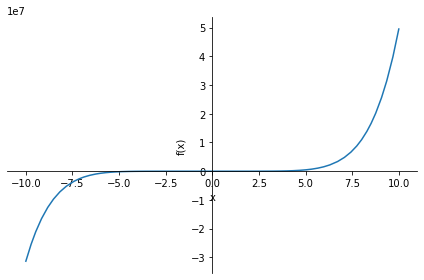

In [93]:
sp.plot(p_2(x))

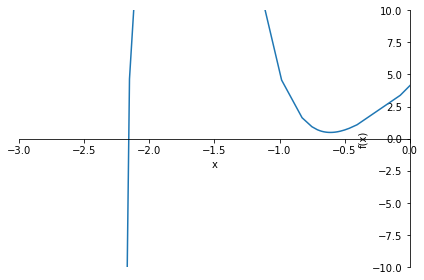

In [94]:
sp.plot(p_2(x), xlim=(-3,0), ylim=(-10,10))

In [95]:
cambioDeSigno(p_2,-2.5,-2)

f( -2.5 ) * f( -2 ) =  -348.578125  *  46  =  -16034.59375
Hay cambio de signo en [ -2.5 , -2 ]


In [96]:
nmax = 100      # Número máximo de iteraciones
prec = 10**(-16)
tol = 10**(-3)

NR_Horner(p(x), -2.0, tol, prec,nmax)

-2.31724137931035

In [97]:
coefs = [4,9,4,9,5,5,9,4]
np.roots(coefs)

array([-2.1643147 +0.j        ,  0.67732475+0.72178791j,
        0.67732475-0.72178791j, -0.09479689+1.05988711j,
       -0.09479689-1.05988711j, -0.62537051+0.159324j  ,
       -0.62537051-0.159324j  ])

Vemos que nos da una única raíz real en el punto -2.1643147. 

In [98]:
def sturm(polinomio,x):
    p0 = polinomio
    p1 = sp.Poly(sp.diff(polinomio,x))
    
    suc_sturm = [p0,p1]
    
    p = p0 % p1
    p = sp.Poly(-p)
    
    while((sp.degree(p,x) != -sp.oo) or (p == p0)):
        
        suc_sturm.append(p)
        
        p0,p1 = p1,p
        
        p = p0 % p1
        p = sp.Poly(-p)
        
    return suc_sturm

In [99]:
suc_sturm = sturm(p(x),x)

for i in range(len(suc_sturm)):
    print("f{}(x) = {}".format(i+1,suc_sturm[i].as_expr()))

f1(x) = 4*x**7 + 9*x**6 + 4*x**5 + 9*x**4 + 5*x**3 + 5*x**2 + 9*x + 4
f2(x) = 28*x**6 + 54*x**5 + 20*x**4 + 36*x**3 + 15*x**2 + 10*x + 9
f3(x) = 131*x**5/98 - 144*x**4/49 - 59*x**3/49 - 565*x**2/196 - 711*x/98 - 703/196
f4(x) = -5135788*x**4/17161 - 3440290*x**3/17161 - 7141848*x**2/17161 - 12224030*x/17161 - 5475456/17161
f5(x) = 133104645869*x**3/269146105928 + 7040454699*x**2/9612360926 - 119987944417*x/269146105928 - 67429018361/134573052964
f6(x) = 1079345562795486223244*x**2/1032390114323868001 + 822495748894486510032*x/1032390114323868001 + 75474502908419965364/1032390114323868001
f7(x) = 191305989805096372110464288937*x/254615007866211579179828684386 + 267815845388894108499617299213/509230015732423158359657368772
f8(x) = -981513011757408625675602357207056127532679/35449759957529576042234356171686796497969


Vimos gráficamente que el polinomio formado por los dígitos de mi DNI no tiene raíces múltiples, luego, es de esperar que $f_8(x)$ sea constante.